In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-detection/fake_news_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/fake-news-detection/fake_news_dataset.csv')

In [3]:
df.head()

id            title        author  \
0   1  Breaking News 1    Jane Smith   
1   2  Breaking News 2   Emily Davis   
2   3  Breaking News 3      John Doe   
3   4  Breaking News 4  Alex Johnson   
4   5  Breaking News 5   Emily Davis   

                                                text           state  \
0  This is the content of article 1. It contains ...       Tennessee   
1  This is the content of article 2. It contains ...       Wisconsin   
2  This is the content of article 3. It contains ...        Missouri   
3  This is the content of article 4. It contains ...  North Carolina   
4  This is the content of article 5. It contains ...      California   

  date_published          source       category  sentiment_score  word_count  \
0     30-11-2021       The Onion  Entertainment            -0.22        1302   
1     02-09-2021    The Guardian     Technology             0.92         322   
2     13-04-2021  New York Times         Sports             0.25         228   
3     08-03-2020             CNN         Sports             0.94         155   
4     23-03-2022      Daily Mail     Technology            -0.01         962   

   ...  num_shares  num_comments  political_bias  fact_check_rating  \
0  ...       47305           450          Center              FALSE   
1  ...       39804           530            Left              Mixed   
2  ...       45860           763          Center              Mixed   
3  ...       34222           945          Center               TRUE   
4  ...       35934           433           Right              Mixed   

   is_satirical  trust_score source_reputation clickbait_score  \
0             1           76                 6            0.84   
1             1            1                 5            0.85   
2             0           57                 1            0.72   
3             1           18                10            0.92   
4             0           95                 6            0.66   

   plagiarism_score  label  
0             53.35   Fake  
1             28.28   Fake  
2              0.38   Fake  
3             32.20   Fake  
4             77.70   Real  

[5 rows x 24 columns]

# DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [5]:
df.describe()

id  sentiment_score   word_count  char_count  has_images  \
count  4000.000000      4000.000000  4000.000000   4000.0000  4000.00000   
mean   2000.500000        -0.000645   795.655750   4277.0680     0.49650   
std    1154.844867         0.574768   406.373871   2186.2073     0.50005   
min       1.000000        -1.000000   100.000000    500.0000     0.00000   
25%    1000.750000        -0.490000   445.750000   2358.7500     0.00000   
50%    2000.500000        -0.010000   793.000000   4287.0000     0.00000   
75%    3000.250000         0.510000  1150.000000   6206.5000     1.00000   
max    4000.000000         1.000000  1500.000000   7996.0000     1.00000   

        has_videos  readability_score    num_shares  num_comments  \
count  4000.000000        4000.000000   4000.000000   4000.000000   
mean      0.484500          54.764595  25144.596750    489.870250   
std       0.499822          14.404027  14387.537467    287.435733   
min       0.000000          30.020000     39.000000      0.000000   
25%       0.000000          42.480000  12781.750000    238.000000   
50%       0.000000          54.235000  25308.500000    483.000000   
75%       1.000000          67.215000  37453.500000    741.000000   
max       1.000000          79.980000  50000.000000   1000.000000   

       is_satirical  trust_score  source_reputation  clickbait_score  \
count   4000.000000  4000.000000         4000.00000      4000.000000   
mean       0.497000    49.960750            5.54925         0.494447   
std        0.500054    29.467911            2.87422         0.289138   
min        0.000000     0.000000            1.00000         0.000000   
25%        0.000000    24.000000            3.00000         0.240000   
50%        0.000000    50.000000            6.00000         0.490000   
75%        1.000000    76.000000            8.00000         0.740000   
max        1.000000   100.000000           10.00000         1.000000   

       plagiarism_score  
count       4000.000000  
mean          50.598110  
std           28.932298  
min            0.040000  
25%           25.915000  
50%           51.480000  
75%           75.580000  
max           99.950000

In [6]:
df['date_published'] = pd.to_datetime(df['date_published'],errors = 'coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4000 non-null   int64         
 1   title              4000 non-null   object        
 2   author             4000 non-null   object        
 3   text               4000 non-null   object        
 4   state              4000 non-null   object        
 5   date_published     4000 non-null   datetime64[ns]
 6   source             4000 non-null   object        
 7   category           4000 non-null   object        
 8   sentiment_score    4000 non-null   float64       
 9   word_count         4000 non-null   int64         
 10  char_count         4000 non-null   int64         
 11  has_images         4000 non-null   int64         
 12  has_videos         4000 non-null   int64         
 13  readability_score  4000 non-null   float64       
 14  num_shar

In [8]:
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [9]:
df.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

In [10]:
cols =  ['author', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

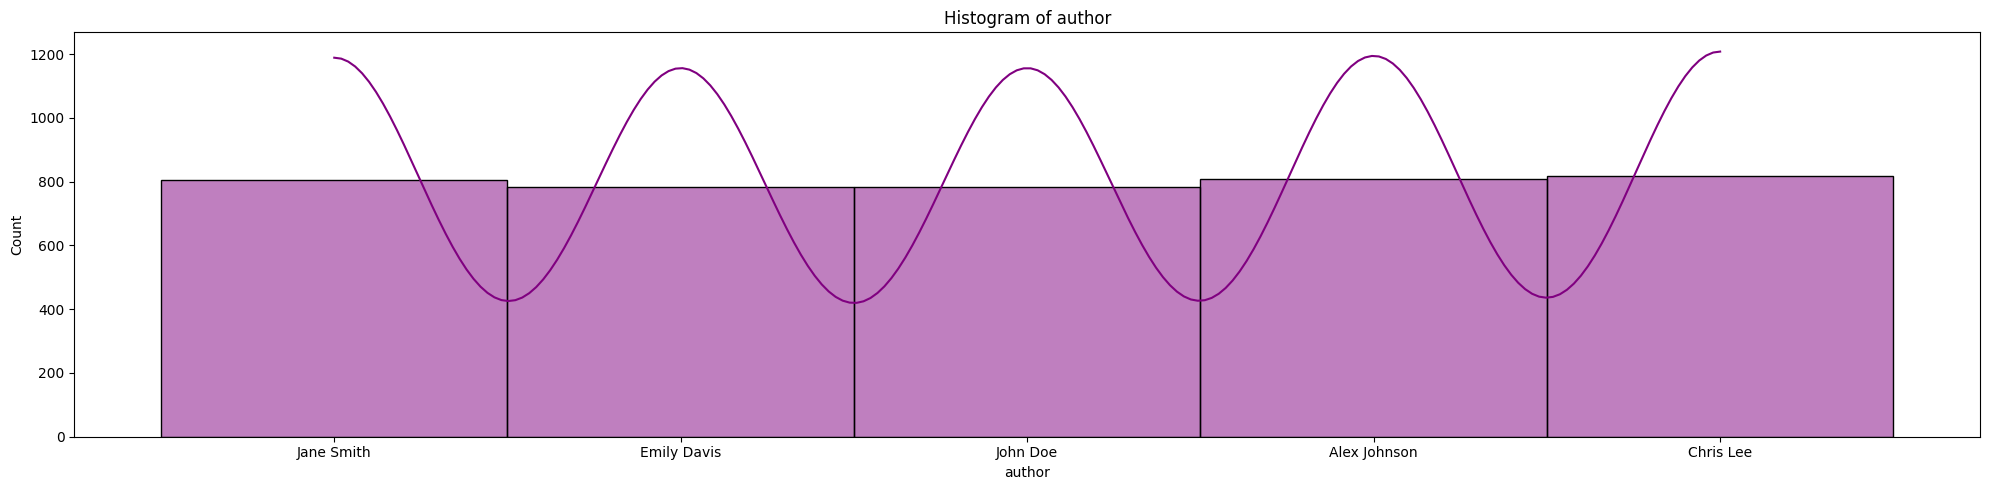

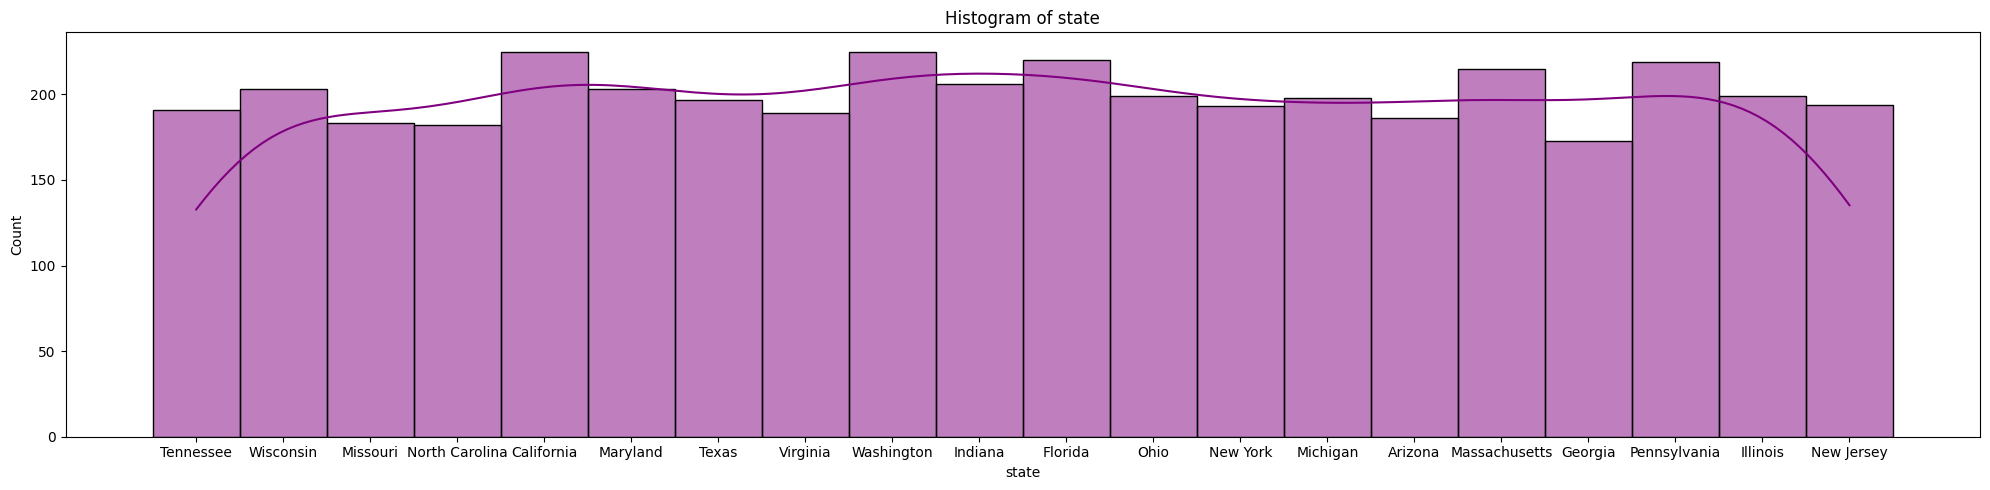

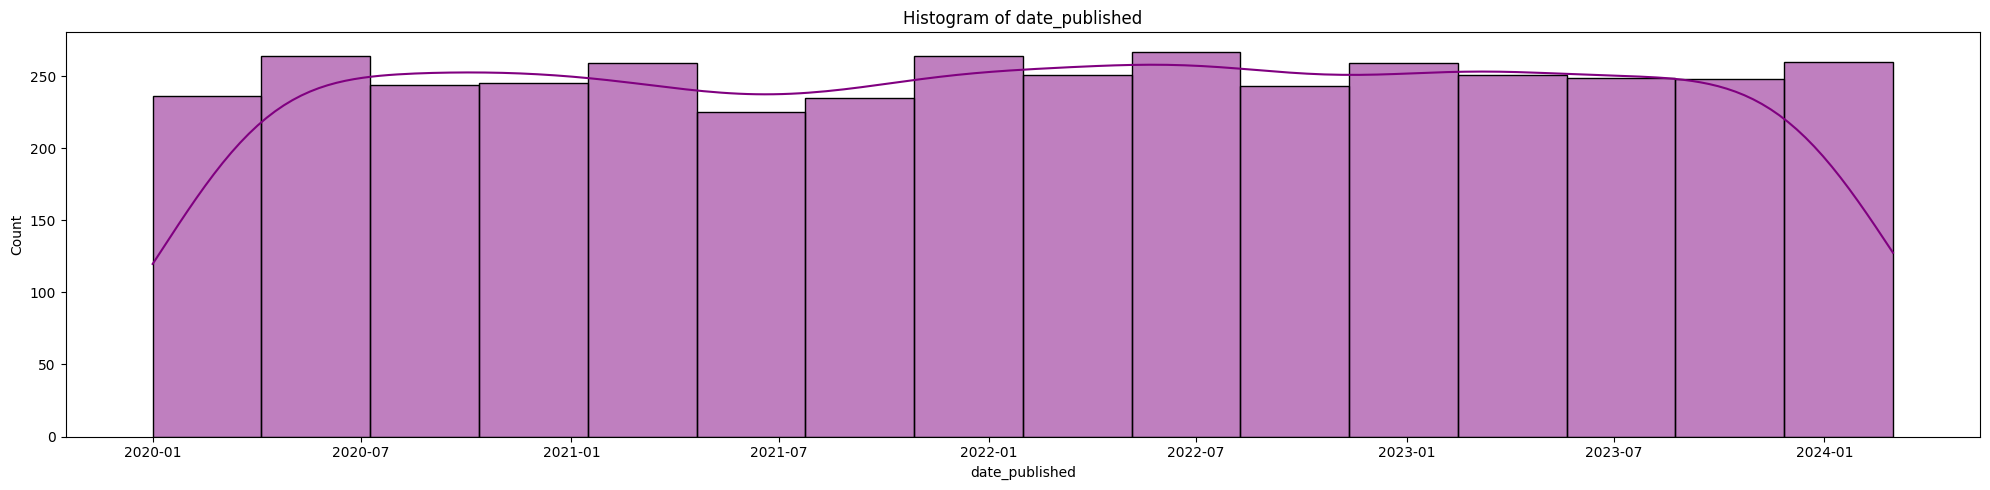

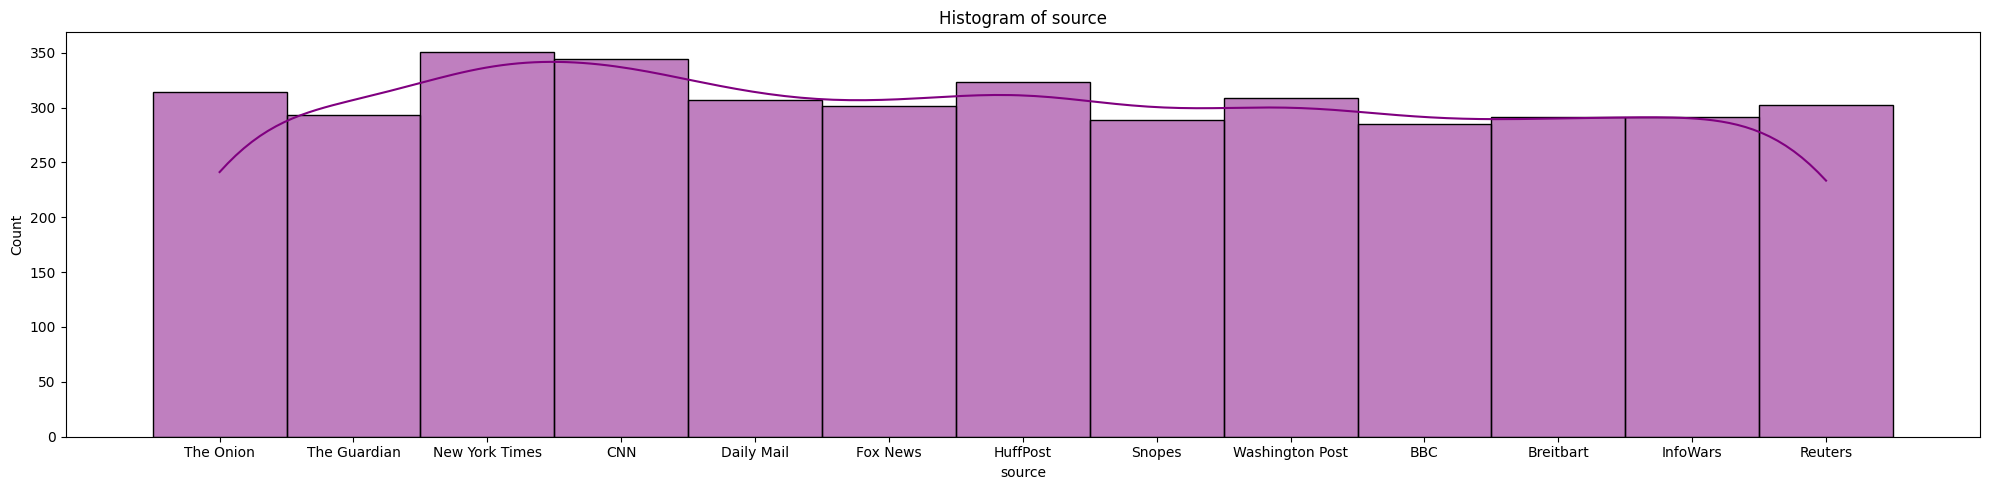

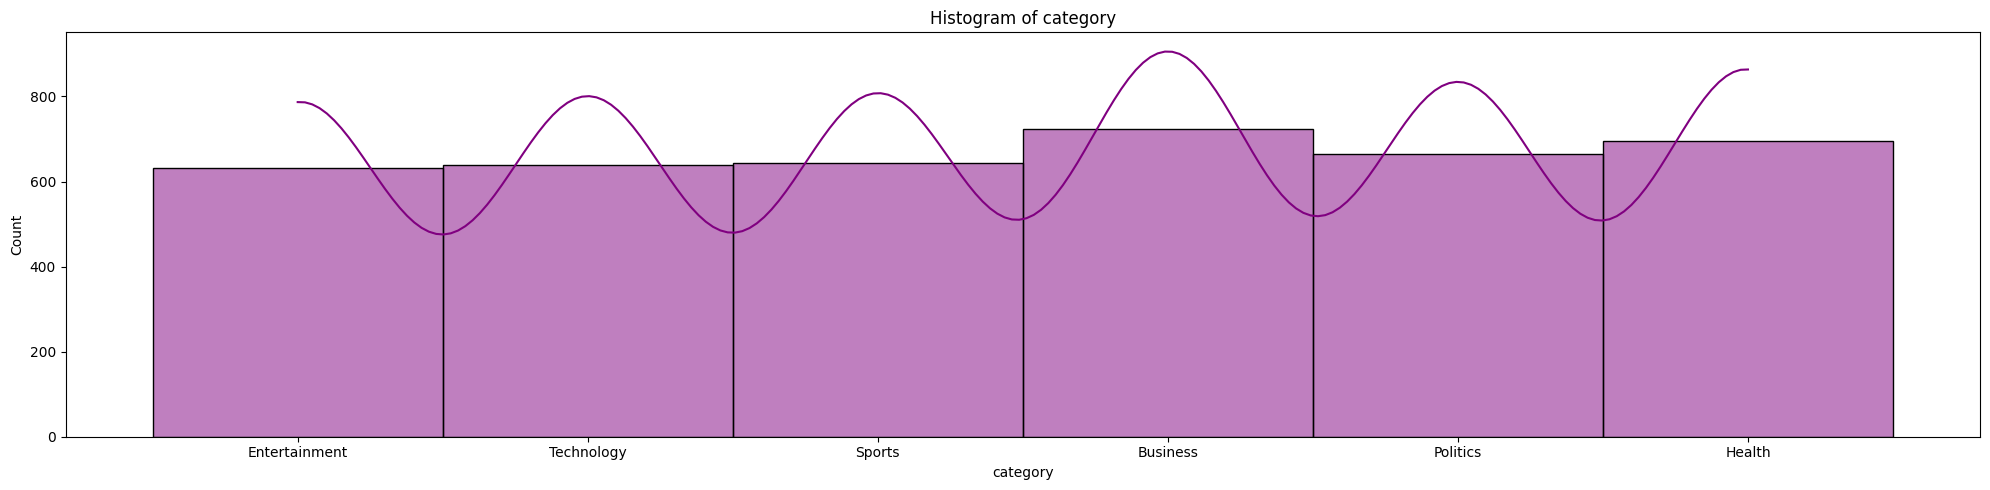

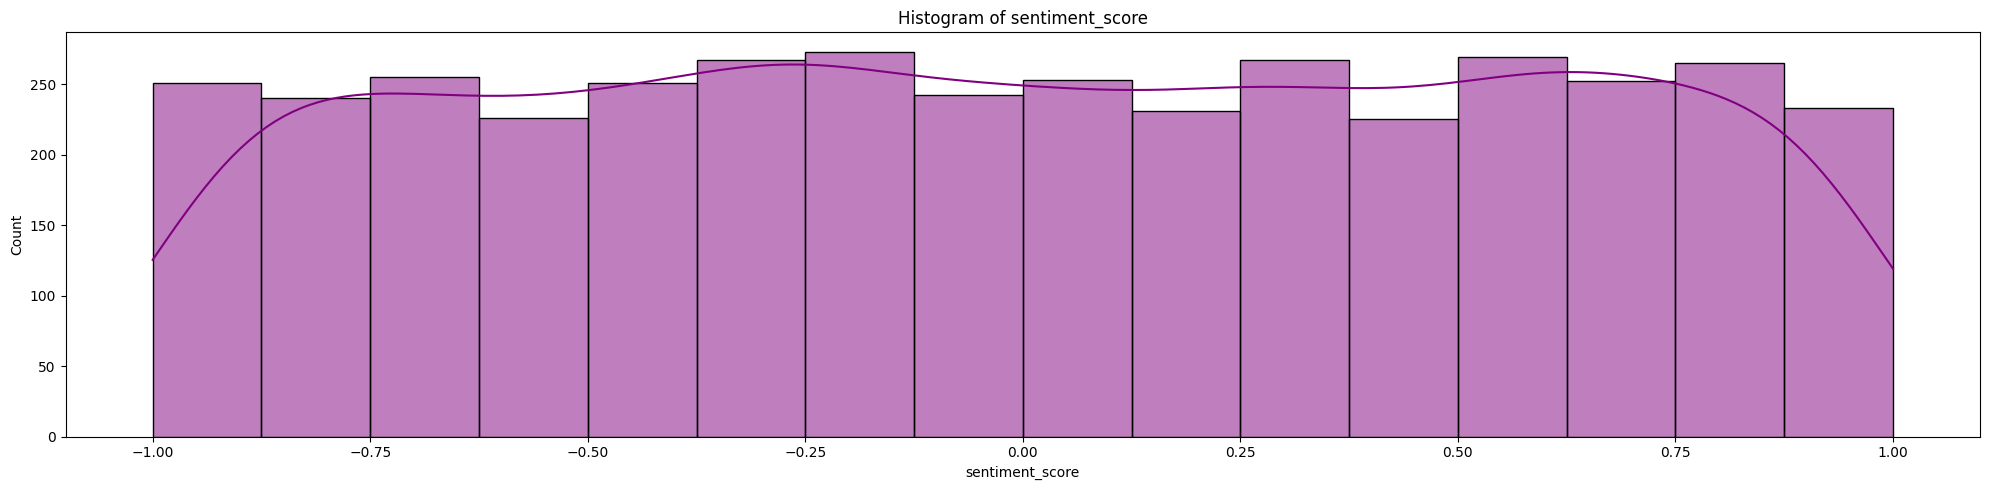

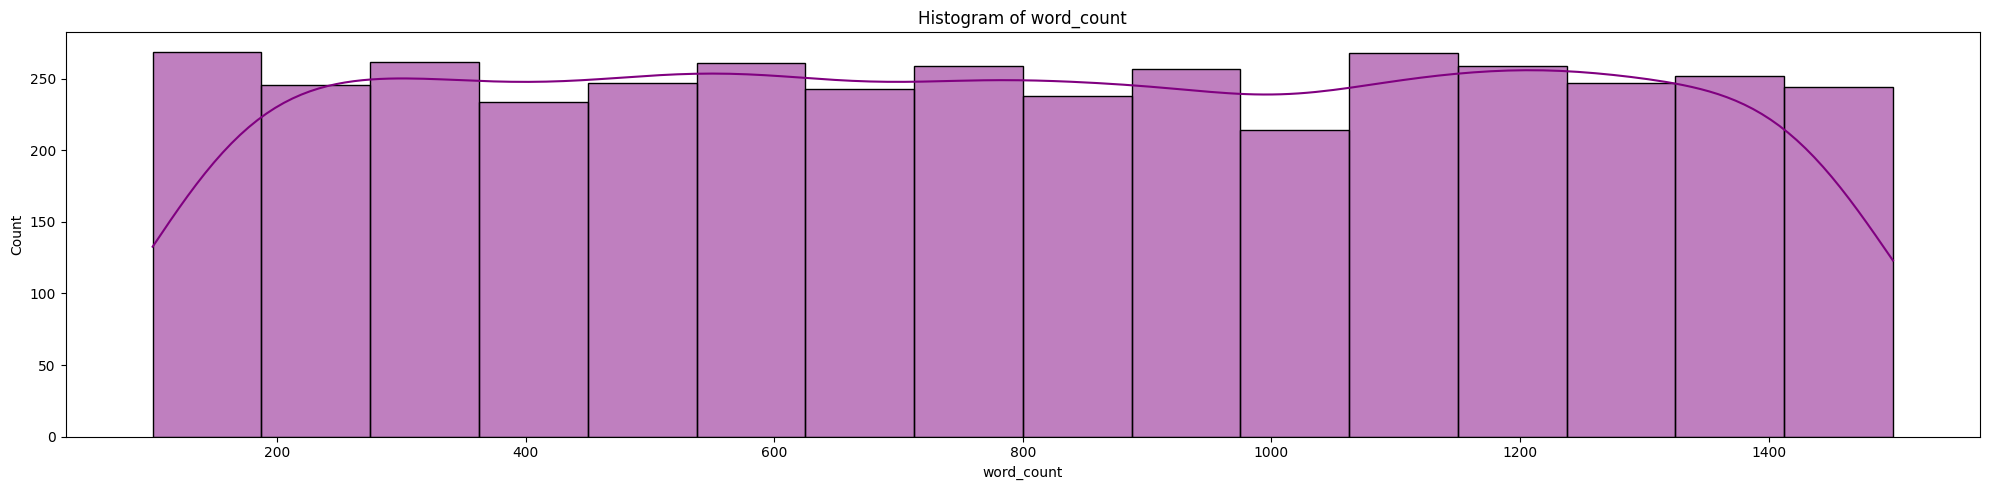

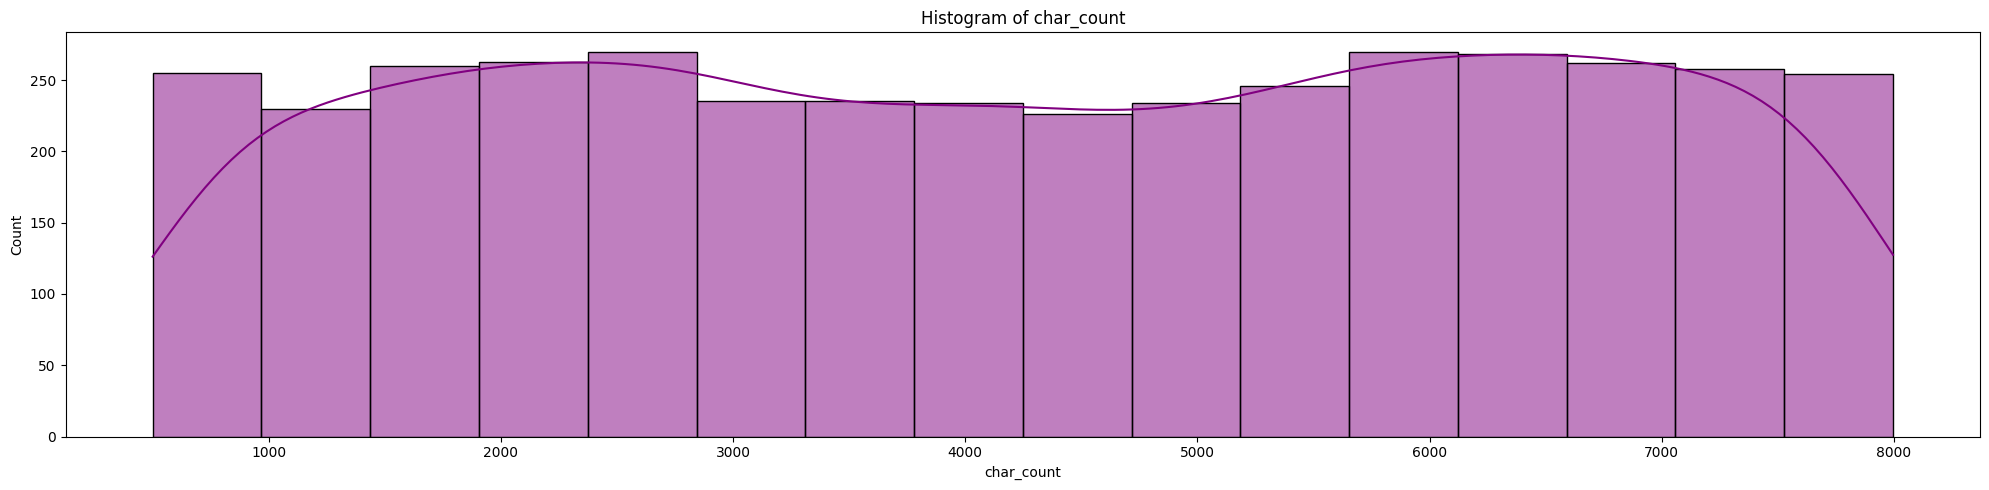

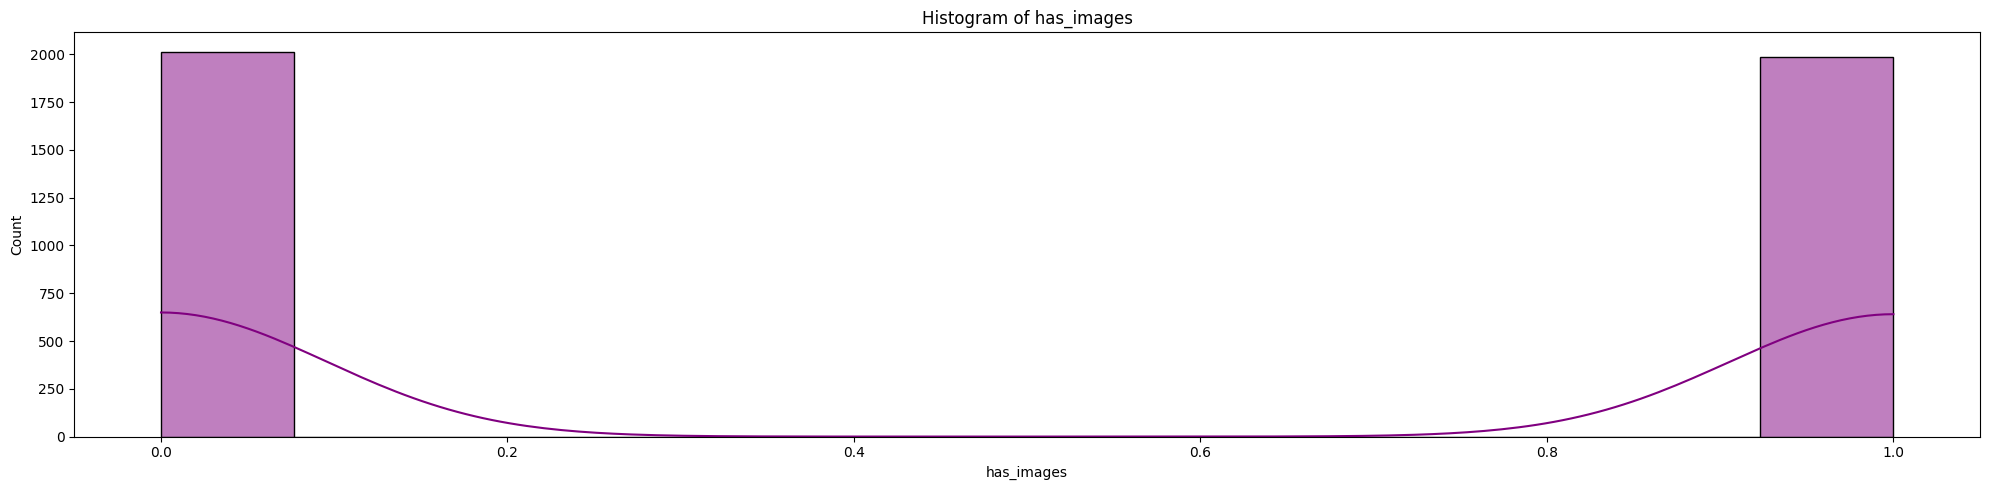

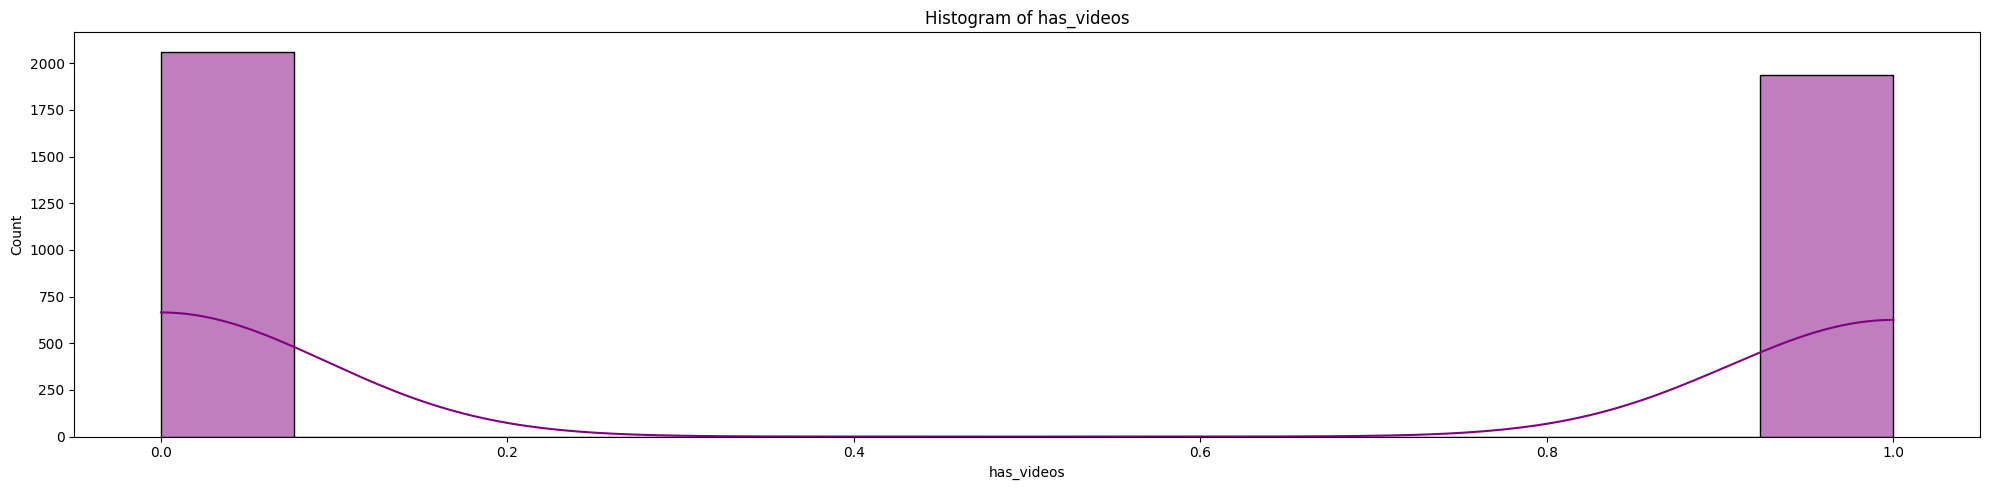

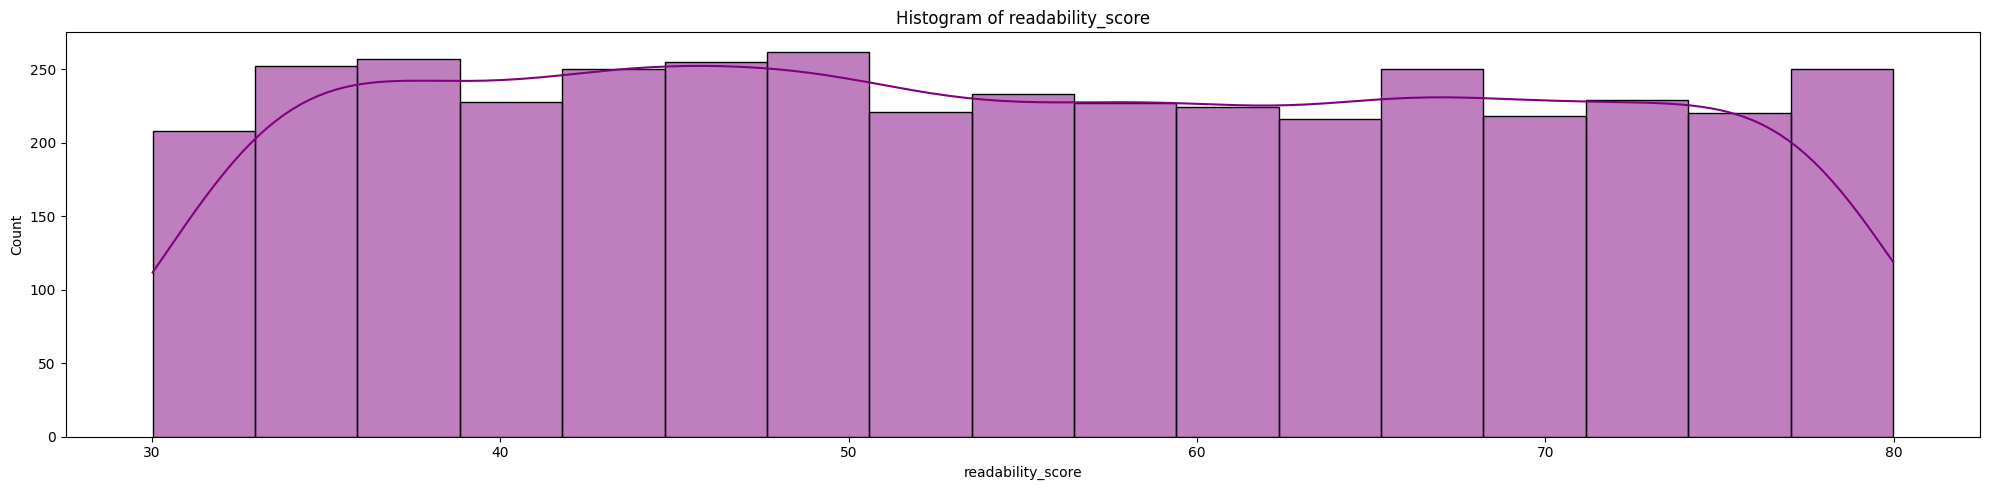

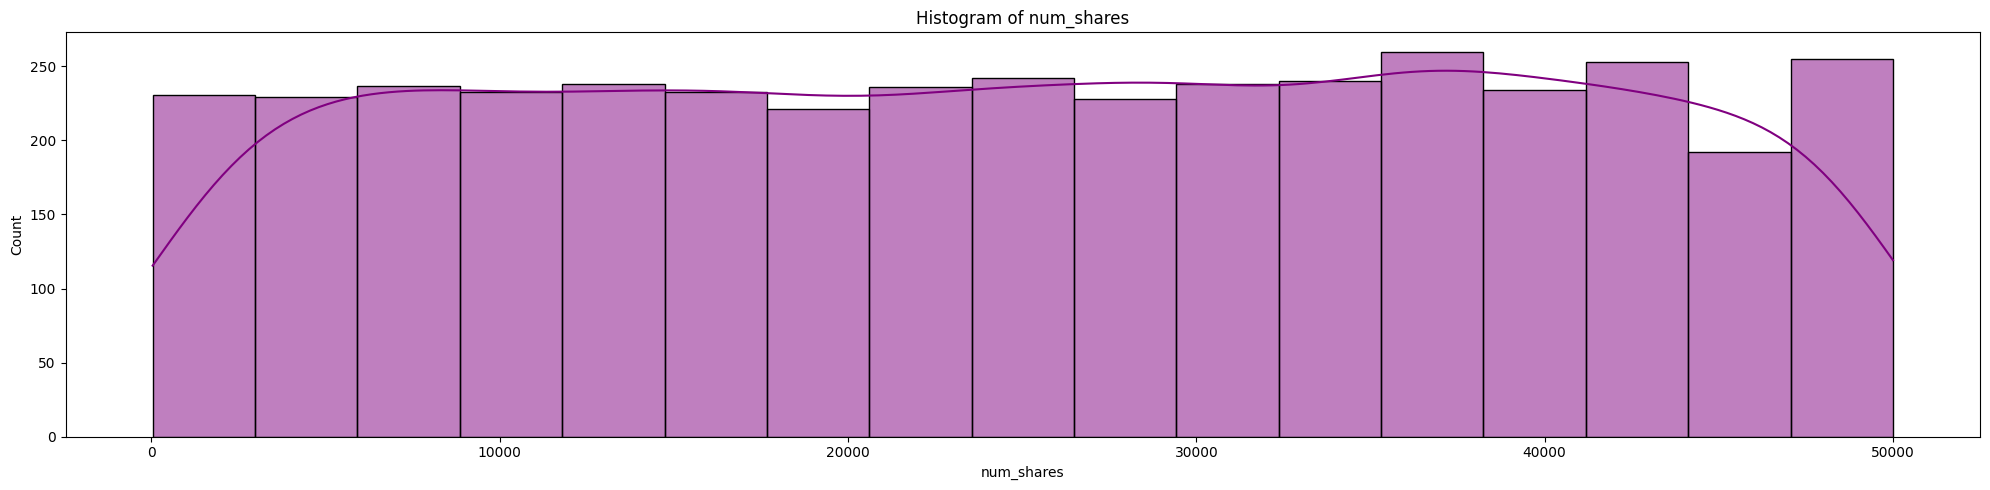

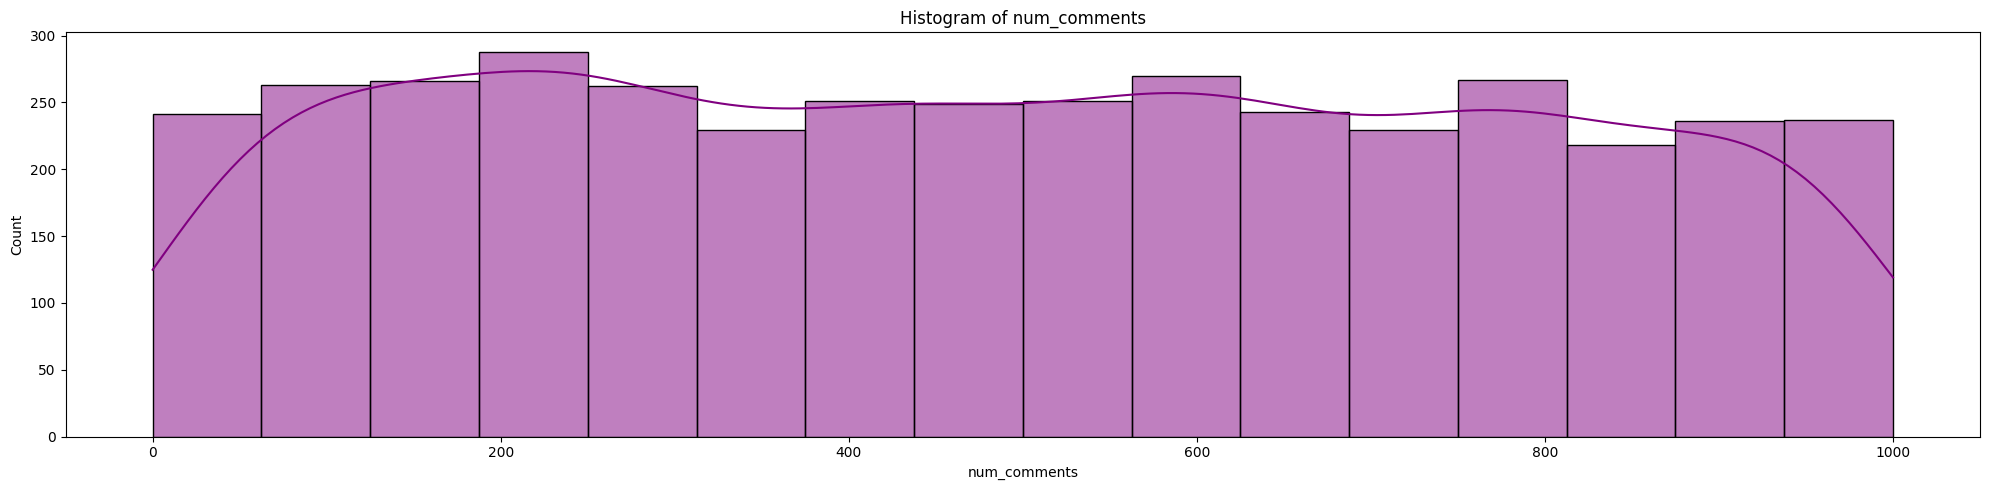

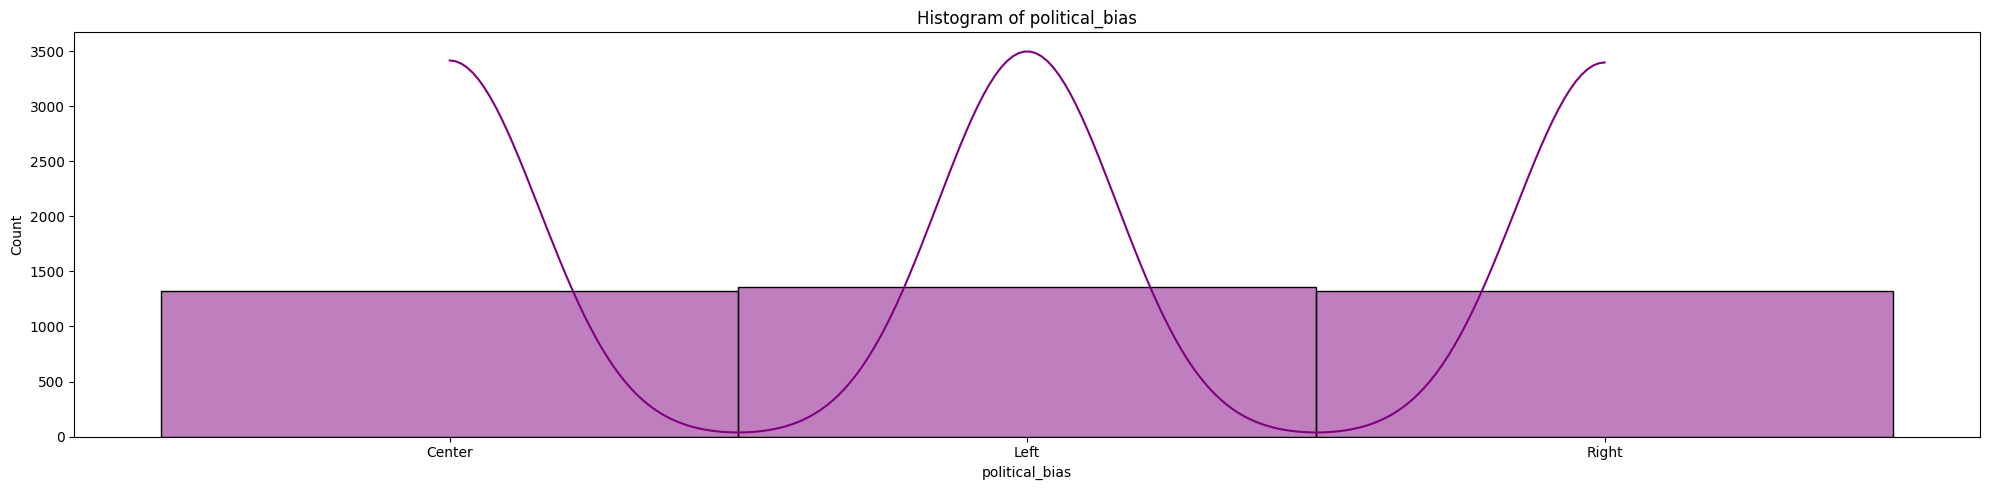

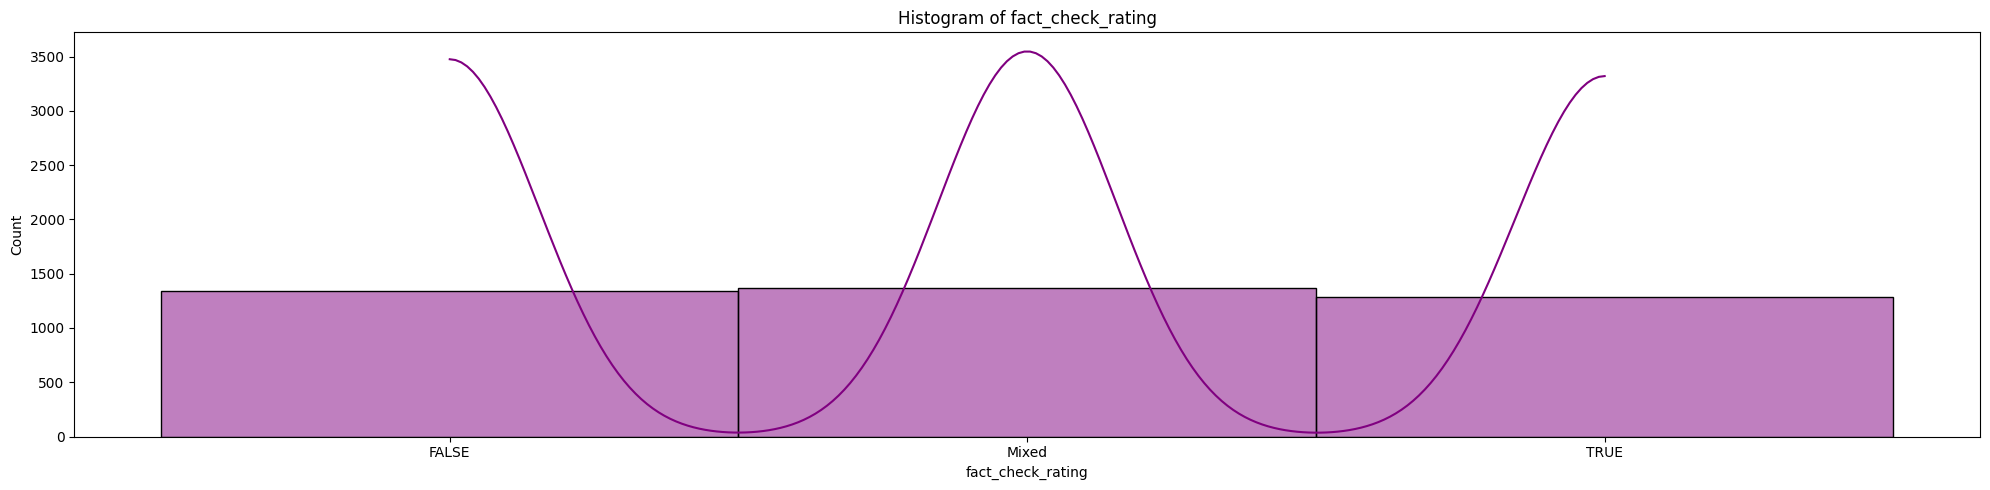

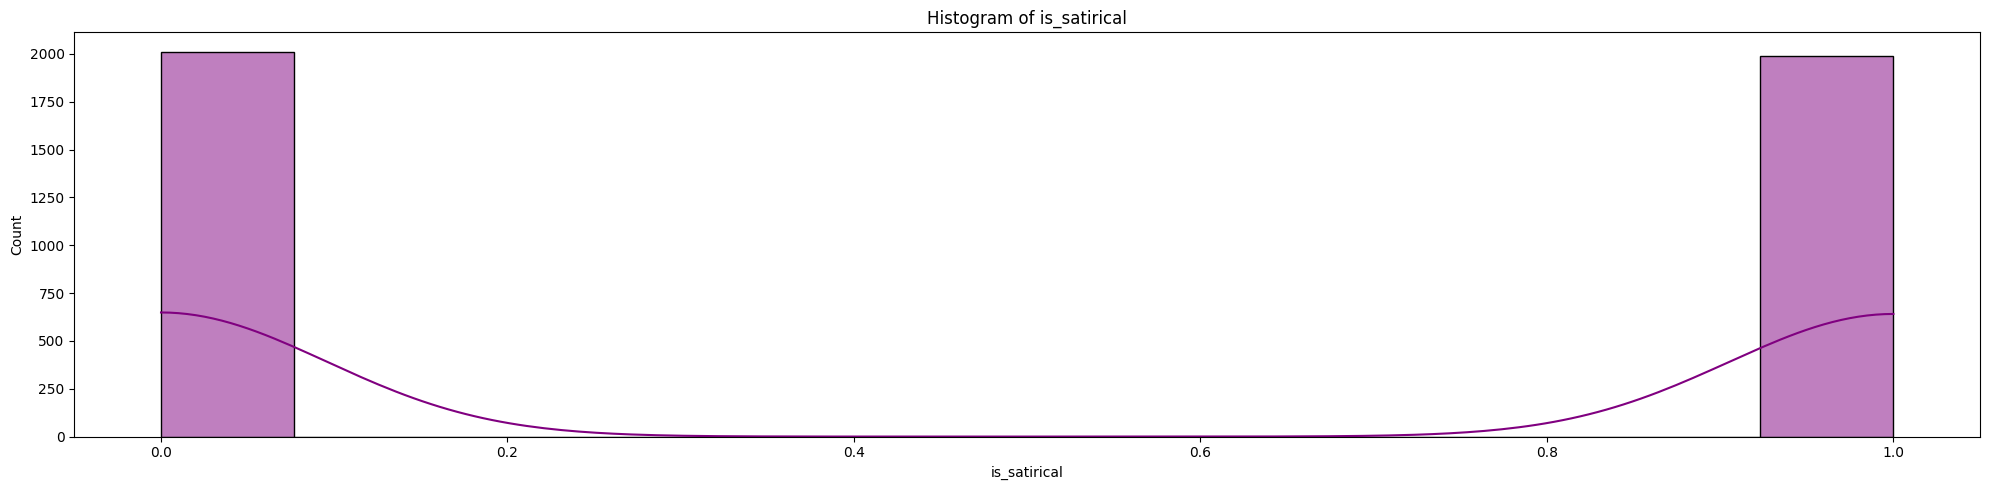

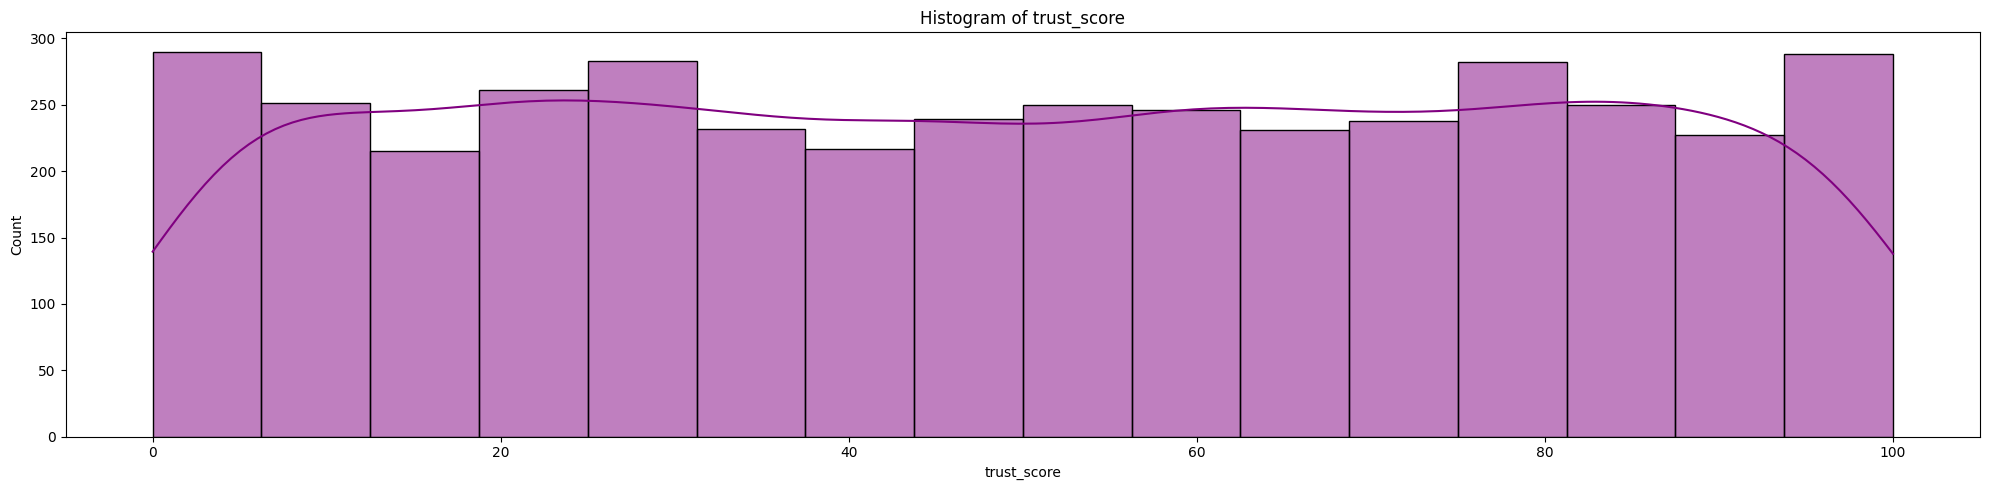

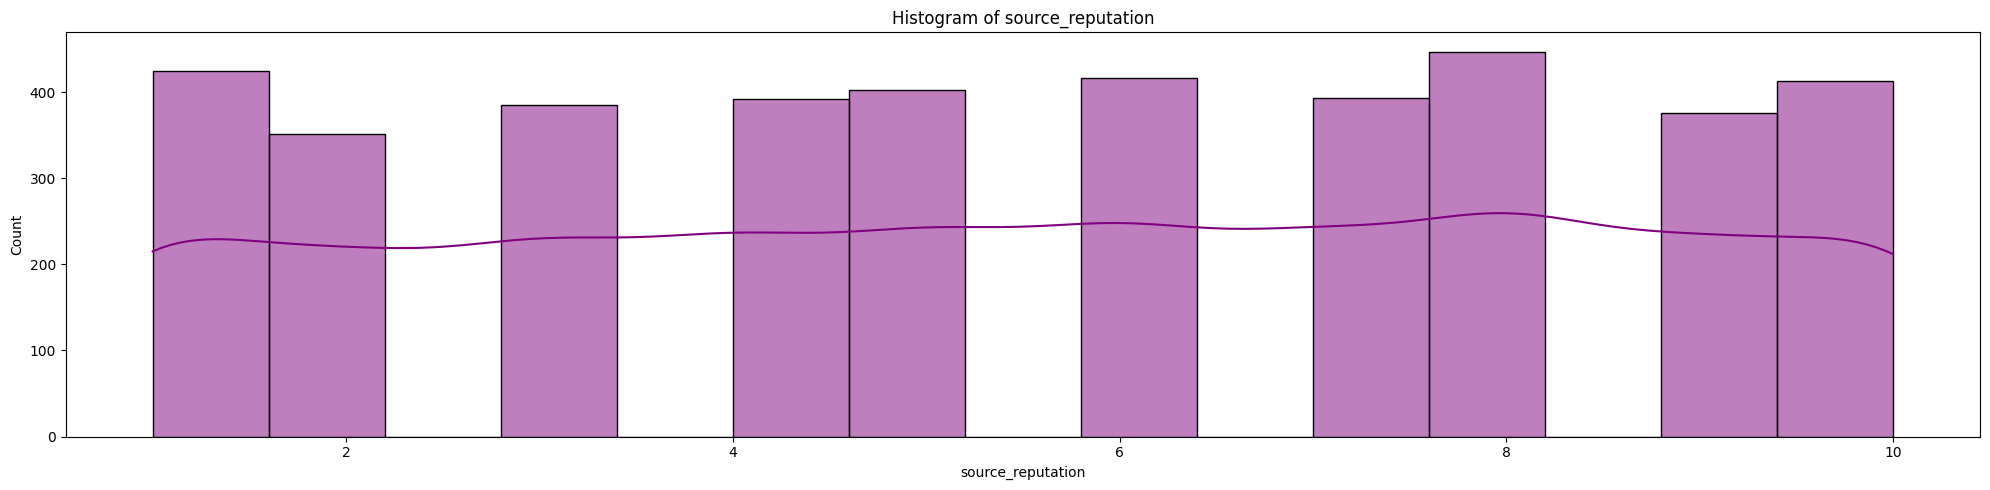

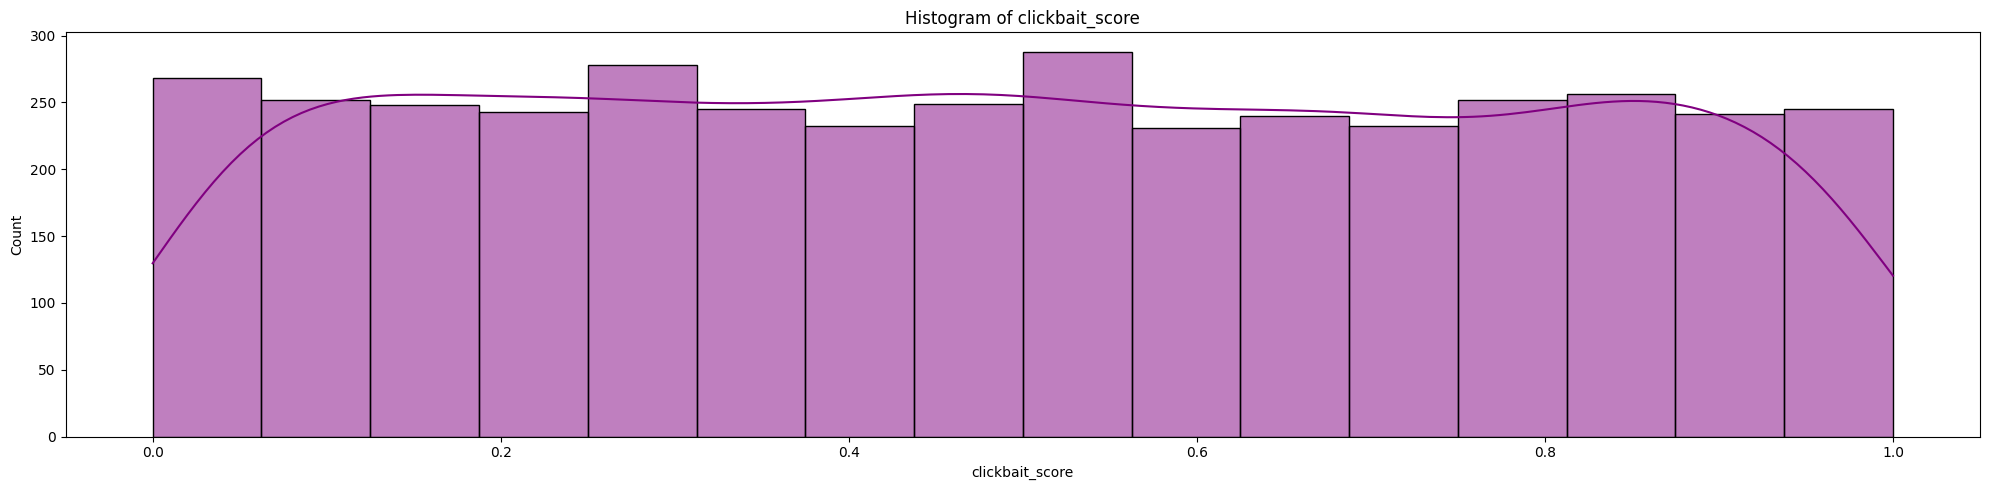

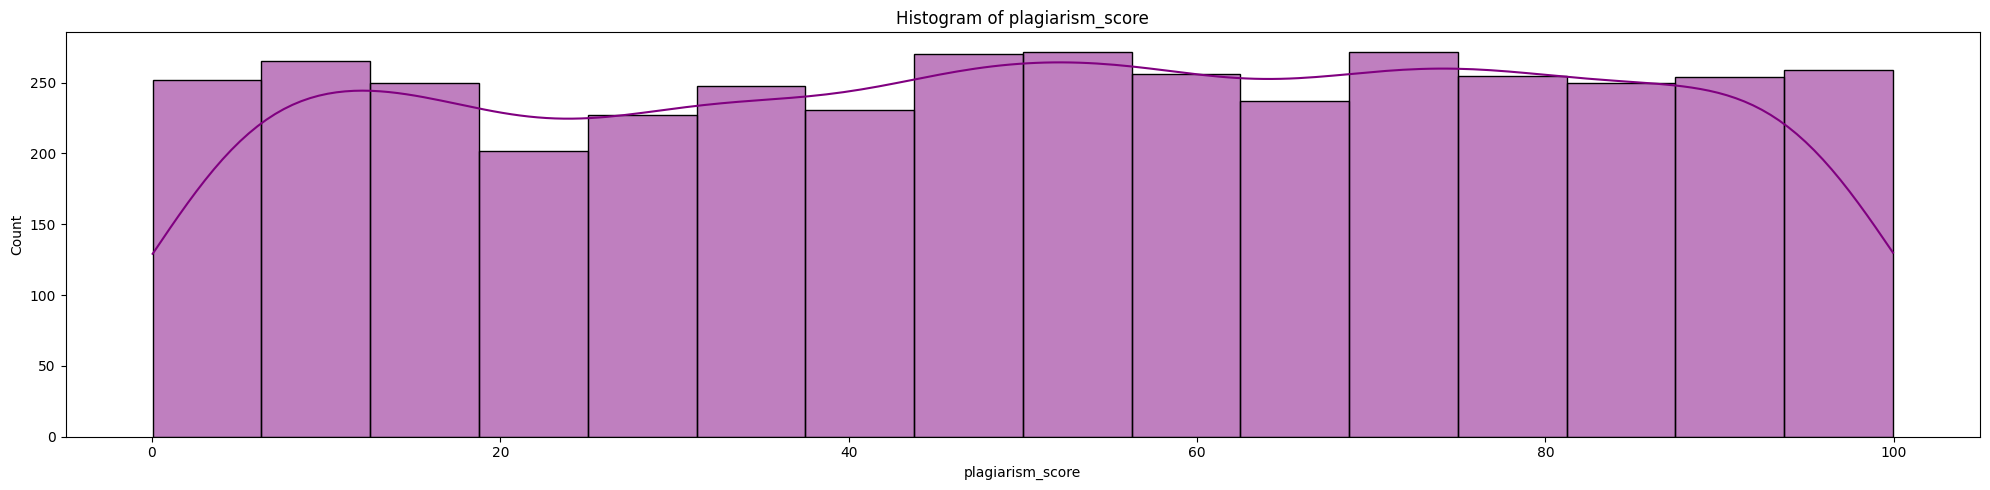

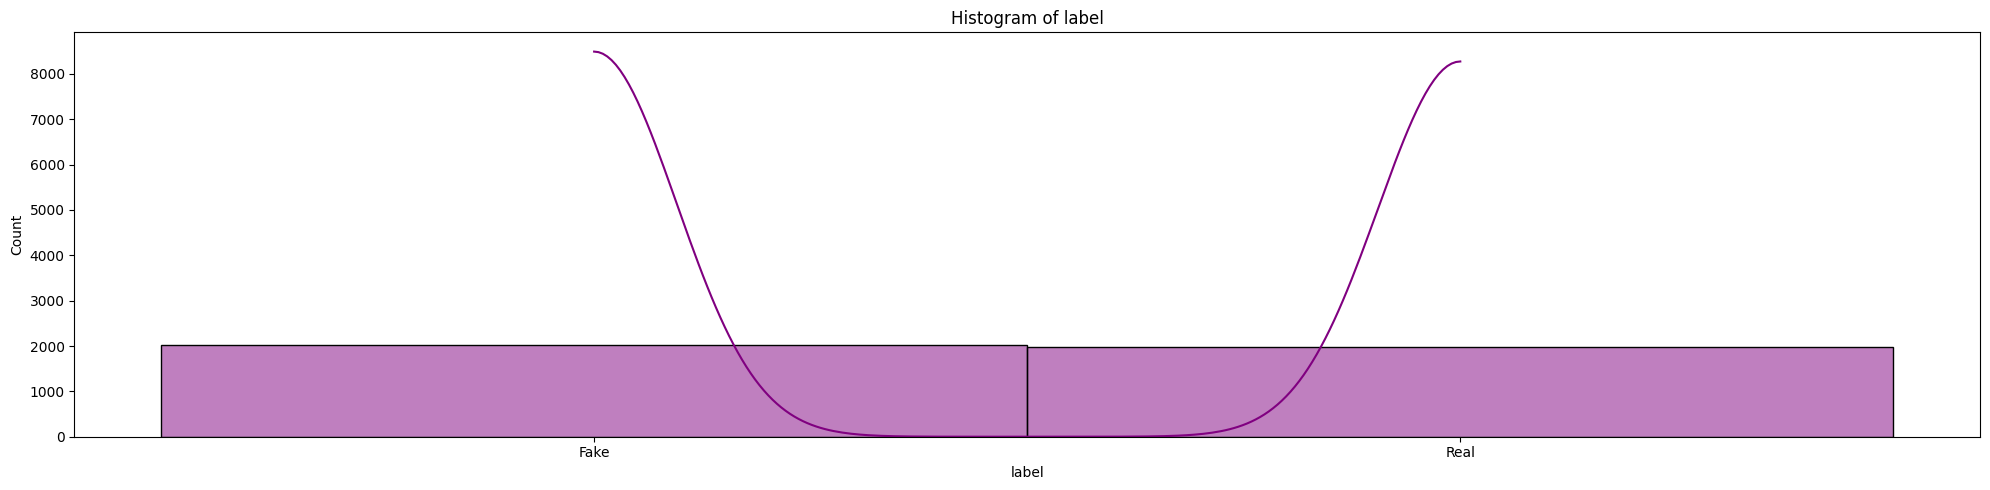

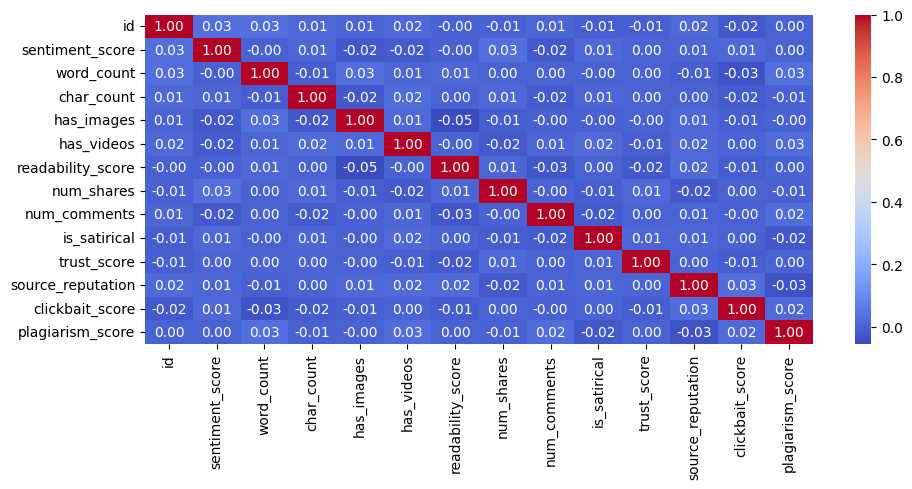

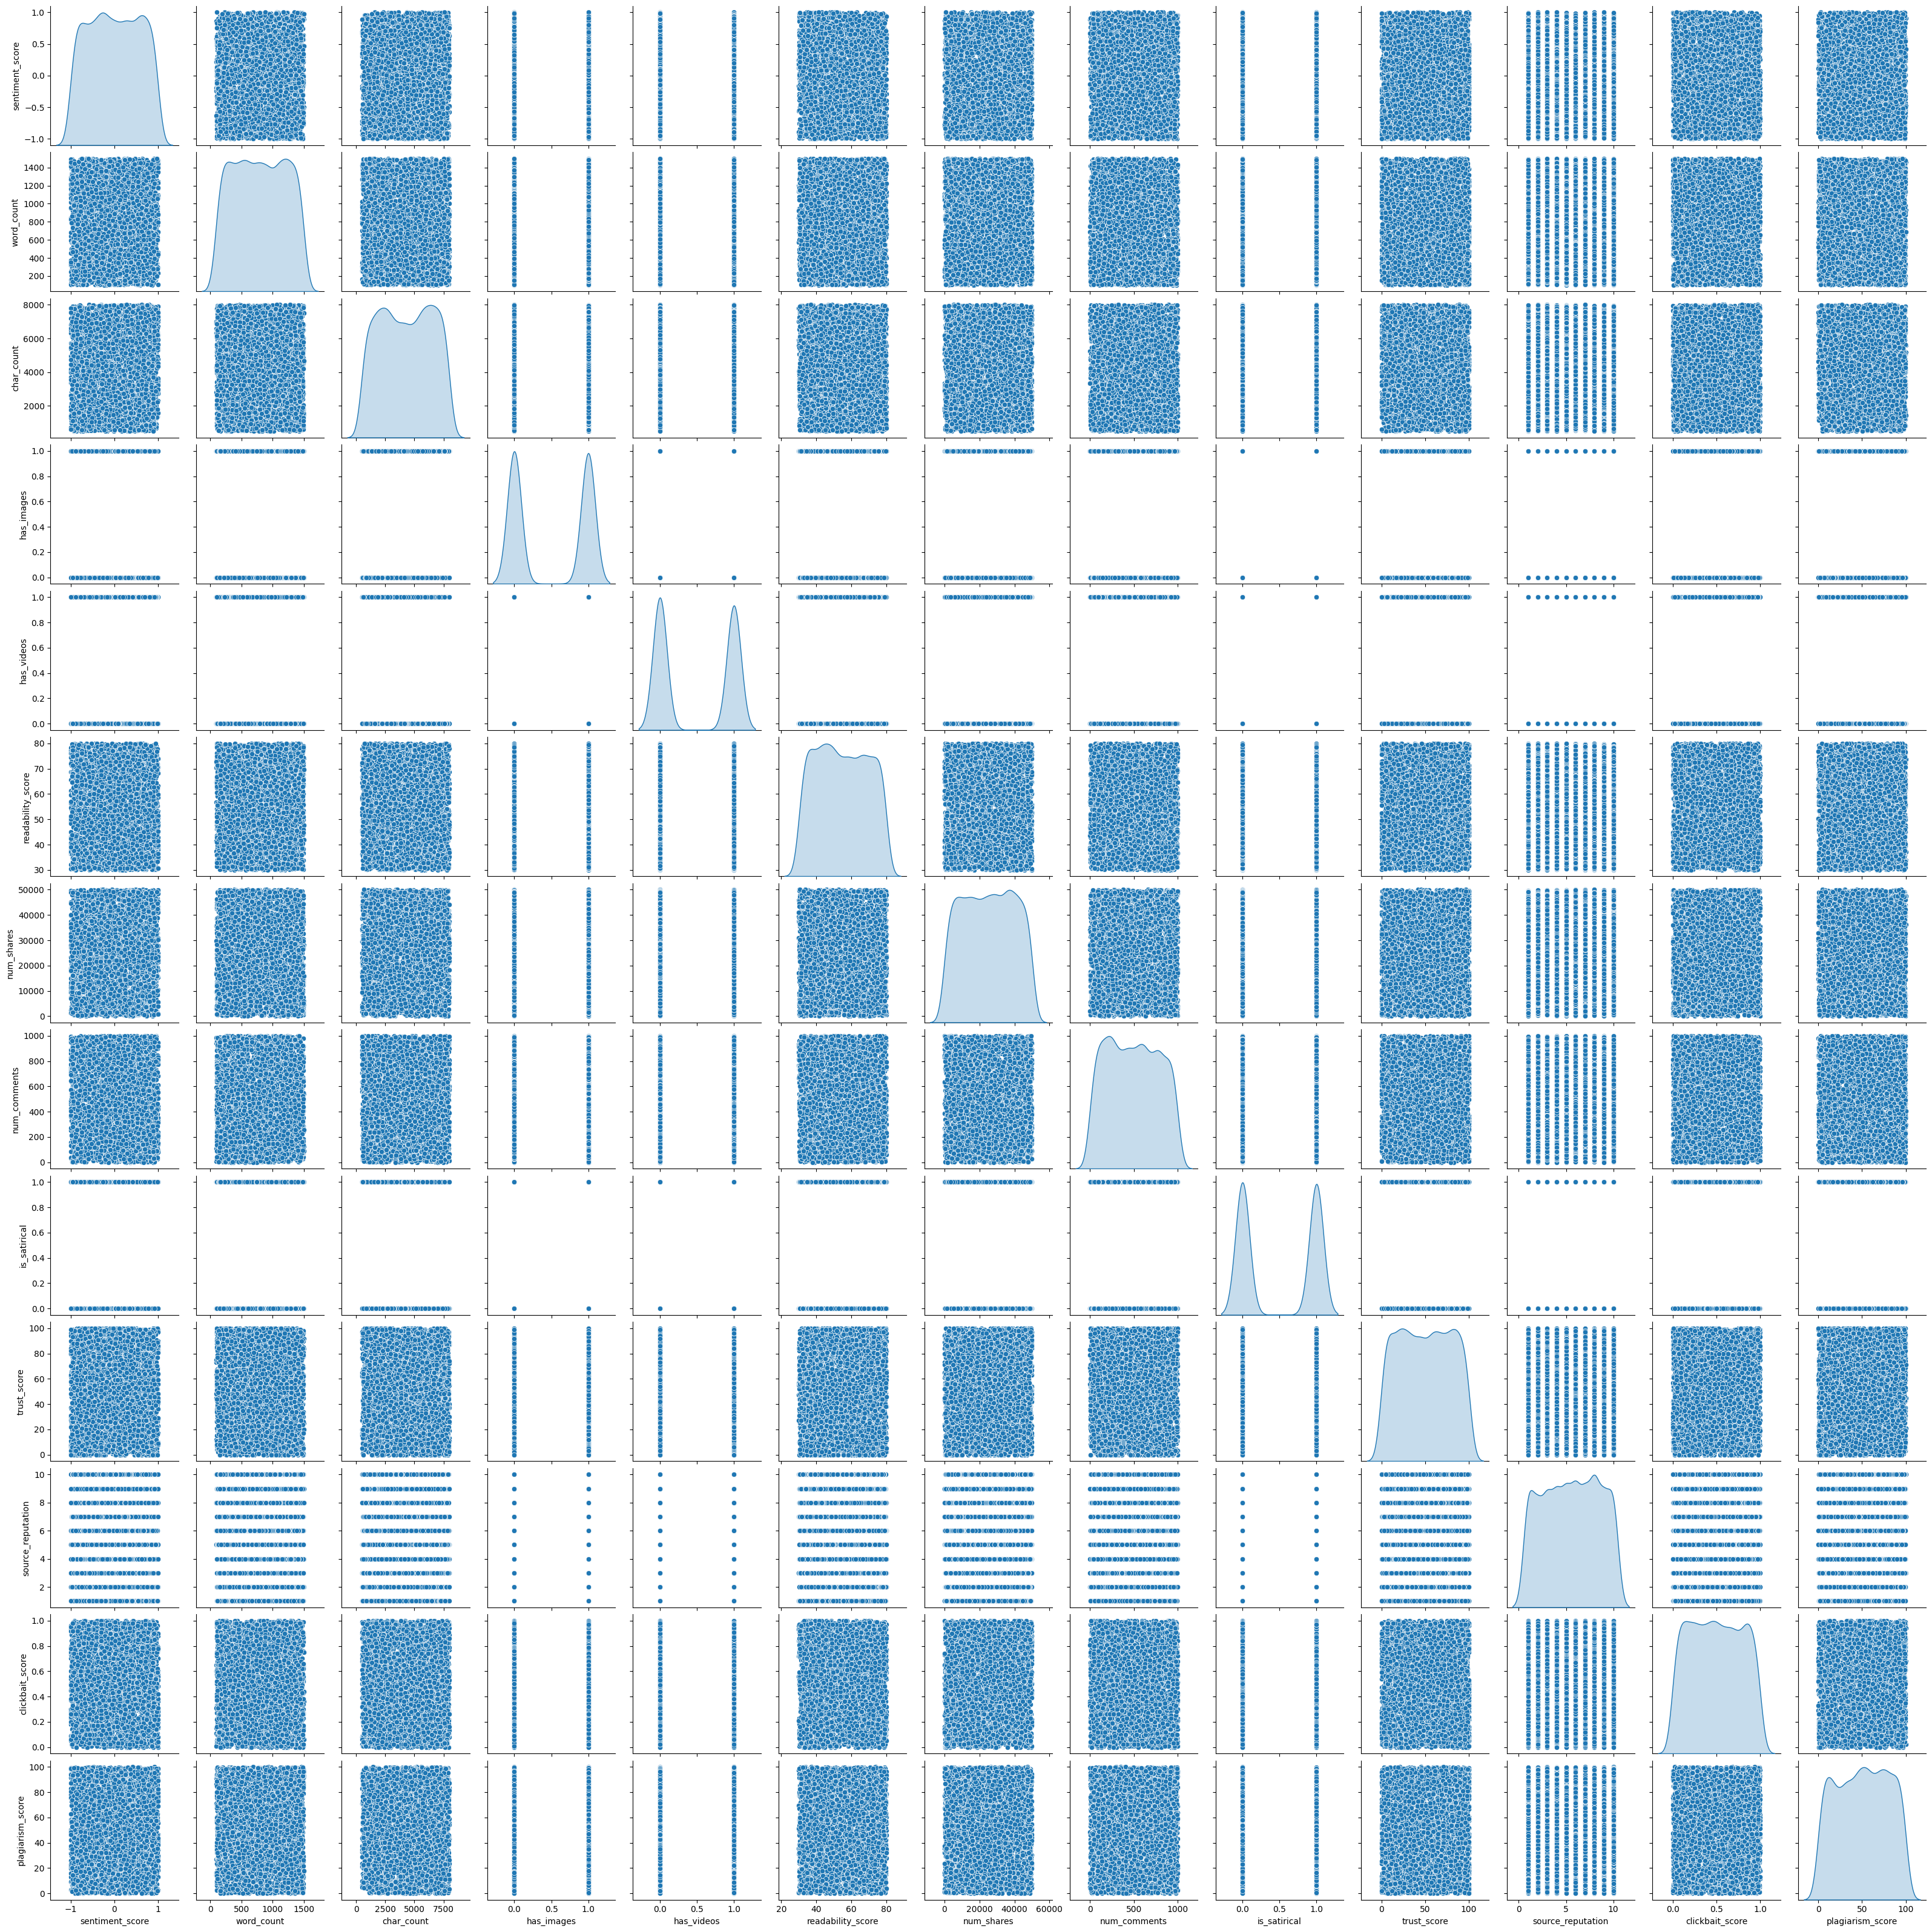

In [12]:
# HISTOGRAM PLOT

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.histplot(df[features].dropna(),color='purple',kde=True)
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


# HEAT-MAP

cols_df = df.select_dtypes(include=[np.number])
if cols_df.shape[1] >= 4:
    plt.figure(figsize=(10,5))
    correlation_matrix = cols_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.tight_layout()
    plt.show()


# PARI-PLOT

if set(cols).issubset(df.columns):
    sns.pairplot(df[cols].dropna(),diag_kind = 'kde')
    plt.show()

In [13]:
df.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4000 non-null   int64         
 1   title              4000 non-null   object        
 2   author             4000 non-null   object        
 3   text               4000 non-null   object        
 4   state              4000 non-null   object        
 5   date_published     4000 non-null   datetime64[ns]
 6   source             4000 non-null   object        
 7   category           4000 non-null   object        
 8   sentiment_score    4000 non-null   float64       
 9   word_count         4000 non-null   int64         
 10  char_count         4000 non-null   int64         
 11  has_images         4000 non-null   int64         
 12  has_videos         4000 non-null   int64         
 13  readability_score  4000 non-null   float64       
 14  num_shar

In [15]:
df['has_videos'].value_counts()

has_videos
0    2062
1    1938
Name: count, dtype: int64

In [16]:
df = df.drop(columns=['date_published','title', 'text','state','date_published'],axis=1)

In [17]:
df = df.drop(columns=['word_count','char_count','num_shares','readability_score', 	'num_comments'],axis=1)

In [18]:
df.head()

id        author          source       category  sentiment_score  \
0   1    Jane Smith       The Onion  Entertainment            -0.22   
1   2   Emily Davis    The Guardian     Technology             0.92   
2   3      John Doe  New York Times         Sports             0.25   
3   4  Alex Johnson             CNN         Sports             0.94   
4   5   Emily Davis      Daily Mail     Technology            -0.01   

   has_images  has_videos political_bias fact_check_rating  is_satirical  \
0           0           0         Center             FALSE             1   
1           1           0           Left             Mixed             1   
2           0           1         Center             Mixed             0   
3           1           0         Center              TRUE             1   
4           1           0          Right             Mixed             0   

   trust_score  source_reputation  clickbait_score  plagiarism_score label  
0           76                  6             0.84             53.35  Fake  
1            1                  5             0.85             28.28  Fake  
2           57                  1             0.72              0.38  Fake  
3           18                 10             0.92             32.20  Fake  
4           95                  6             0.66             77.70  Real

In [19]:
feat = ['author', 'source','category','political_bias', 'fact_check_rating', 'label']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
for column in feat:
    df[column] = le.fit_transform(df[column])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   author             4000 non-null   int64  
 2   source             4000 non-null   int64  
 3   category           4000 non-null   int64  
 4   sentiment_score    4000 non-null   float64
 5   has_images         4000 non-null   int64  
 6   has_videos         4000 non-null   int64  
 7   political_bias     4000 non-null   int64  
 8   fact_check_rating  4000 non-null   int64  
 9   is_satirical       4000 non-null   int64  
 10  trust_score        4000 non-null   int64  
 11  source_reputation  4000 non-null   int64  
 12  clickbait_score    4000 non-null   float64
 13  plagiarism_score   4000 non-null   float64
 14  label              4000 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 468.9 KB


In [24]:
df['author'].value_counts()

author
1    819
0    809
3    806
2    783
4    783
Name: count, dtype: int64

In [25]:
df = df.drop(columns=['clickbait_score','plagiarism_score' ,'trust_score'])

In [26]:
df

id  author  source  category  sentiment_score  has_images  has_videos  \
0        1       3      11         1            -0.22           0           0   
1        2       2      10         5             0.92           1           0   
2        3       4       7         4             0.25           0           1   
3        4       0       2         4             0.94           1           0   
4        5       2       3         5            -0.01           1           0   
...    ...     ...     ...       ...              ...         ...         ...   
3995  3996       4       6         5             0.91           1           1   
3996  3997       0       2         4            -0.57           0           1   
3997  3998       0       1         1            -0.17           0           1   
3998  3999       4       7         2            -0.88           1           0   
3999  4000       4      10         2            -0.95           0           0   

      political_bias  fact_check_rating  is_satirical  source_reputation  \
0                  0                  0             1                  6   
1                  1                  1             1                  5   
2                  0                  1             0                  1   
3                  0                  2             1                 10   
4                  2                  1             0                  6   
...              ...                ...           ...                ...   
3995               2                  1             0                 10   
3996               1                  0             1                  3   
3997               1                  0             0                  9   
3998               1                  0             1                  6   
3999               2                  2             1                  4   

      label  
0         0  
1         0  
2         0  
3         0  
4         1  
...     ...  
3995      0  
3996      0  
3997      0  
3998      1  
3999      1  

[4000 rows x 12 columns]

# MODEL TRAINING AND PREDICTIONS.

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
df = df.astype(int)

In [29]:
X = df.drop(columns = ['label'])
y = df['label']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred_lr = lr.predict(X_test)

In [34]:
acc_lr = accuracy_score(y_test,y_pred_lr)
print(f'acc lr:',acc_lr*100)

acc lr: 48.75


# SVM

In [35]:
sv = SVC()

In [36]:
sv = SVC()

In [37]:
sv.fit(X_train,y_train)

SVC()

In [38]:
y_pred_sv = sv.predict(X_test)

In [39]:
acc_sv = accuracy_score(y_test,y_pred_sv)
print(f'acc SV:',acc_sv*100)

acc SV: 49.125


# RandomForestRegressor

In [40]:
rfr = RandomForestRegressor()

In [41]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
y_pred_rfr = rfr.predict(X_test)

In [43]:
mse = mean_squared_error(y_test,y_pred_rfr)
r2score = r2_score(y_test,y_pred_rfr)
mae = mean_absolute_error(y_test,y_pred_rfr)
print(f'MSE:',mse)
print(f'R2-Score:',r2score)
print(f'MAE:',mae)

MSE: 0.25997725000000005
R2-Score: -0.040696026369942295
MAE: 0.49555000000000005


# RandomForestClassifier

In [44]:
rfc = RandomForestClassifier()

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred_rfc = rfc.predict(X_test)

In [47]:
acc_rfc = accuracy_score(y_pred_rfc,y_test)
print(f'acc rfc:',acc_rfc*100)

acc rfc: 51.125


# DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred_dt = dt.predict(X_test)

In [51]:
acc_dt = accuracy_score(y_pred_dt,y_test)
print(f'acc_dt:',acc_dt*100)

acc_dt: 51.0


# GradientBoostingClassifier

In [52]:
gb = GradientBoostingClassifier()

In [53]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [54]:
y_pred_gb = gb.predict(X_test)

In [55]:
acc_gb = accuracy_score(y_pred_gb,y_test)
print(f'acc gb:',acc_gb*100)

acc gb: 51.24999999999999


# KNeighborsClassifier

In [56]:
kn = KNeighborsClassifier()

In [57]:
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
y_pred_kn = kn.predict(X_test)

In [59]:
acc_kn = accuracy_score(y_pred_kn,y_test)
print(f'acc kn:',acc_kn*100)

acc kn: 50.0


In [60]:
df['fact_check_rating'].value_counts()

fact_check_rating
1    1372
0    1344
2    1284
Name: count, dtype: int64

In [61]:
df.columns

Index(['id', 'author', 'source', 'category', 'sentiment_score', 'has_images',
       'has_videos', 'political_bias', 'fact_check_rating', 'is_satirical',
       'source_reputation', 'label'],
      dtype='object')

In [62]:
df['sentiment_score'].value_counts()

sentiment_score
 0    3980
-1      11
 1       9
Name: count, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 4000 non-null   int64
 1   author             4000 non-null   int64
 2   source             4000 non-null   int64
 3   category           4000 non-null   int64
 4   sentiment_score    4000 non-null   int64
 5   has_images         4000 non-null   int64
 6   has_videos         4000 non-null   int64
 7   political_bias     4000 non-null   int64
 8   fact_check_rating  4000 non-null   int64
 9   is_satirical       4000 non-null   int64
 10  source_reputation  4000 non-null   int64
 11  label              4000 non-null   int64
dtypes: int64(12)
memory usage: 375.1 KB
